In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df  = pd.read_csv("sipna_data.csv")

In [70]:
df.head()

,age,height,weight,armlen,gender,food,is vegetarian,Unnamed: 7
0,37,175.0,85.0,40,Male,Vegetarian,1,NaN
1,31,160.0,70.0,40,Male,Vegetarian,1,NaN
2,36,175.0,75.0,40,Male,Vegetarian,1,NaN
3,21,154.0,50.0,14,Female,Vegetarian,1,NaN
4,50,172.0,78.0,70,Male,Non-vegetarian,0,NaN


In [71]:
df.drop('Unnamed: 7',inplace=True, axis= 1)

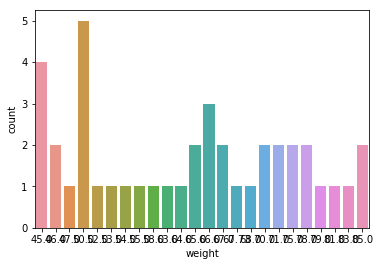

In [72]:
sns.countplot(x="weight", data=df)

In [73]:
food_no = pd.get_dummies(df['food'],drop_first = True)

In [74]:
food_no.head()

,Vegetarian
0,1
1,1
2,1
3,1
4,0


In [75]:
df.drop(["food"],axis=1,inplace =True)

In [76]:
df.head()

,age,height,weight,armlen,gender,is vegetarian
0,37,175.0,85.0,40,Male,1
1,31,160.0,70.0,40,Male,1
2,36,175.0,75.0,40,Male,1
3,21,154.0,50.0,14,Female,1
4,50,172.0,78.0,70,Male,0


In [77]:
X = df.drop(["gender"],axis=1)

In [78]:
y =df['gender']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [80]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [81]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[2 3]
 [0 8]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

             precision    recall  f1-score   support

     Female       1.00      0.40      0.57         5
       Male       0.73      1.00      0.84         8

avg / total       0.83      0.77      0.74        13

